In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import torch
from tqdm.notebook import tqdm
from transformers import AutoTokenizer, pipeline

import pandas as pd

import ipywidgets as widgets
from IPython.display import display, clear_output

import plotly.express as px

import matplotlib.pyplot as plt

import seaborn as sns

from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from ipywidgets import interact

In [3]:
df_combined = pd.read_csv('combined_review_data_with_sentiment.csv')

In [4]:
df_combined.shape

(126725, 8)

# **EXploratory Data Analysis**

In [ ]:


# Prepare data
df_combined1 = df_combined.copy()
df_combined1['review_datetime'] = pd.to_datetime(df_combined1['review_datetime'], errors='coerce')
df_combined1['month_year'] = df_combined1['review_datetime'].dt.to_period('M').astype(str)

monthly_reviews = df_combined1.groupby(['app_name', 'month_year']).size().reset_index(name='review_count')

# Plot using Plotly
fig = px.line(
    monthly_reviews,
    x='month_year',
    y='review_count',
    color='app_name',
    markers=True,
    title='Monthly Review Counts per App',
    labels={
        'month_year': 'Month-Year',
        'review_count': 'Number of Reviews',
        'app_name': 'App Name'
    },
    hover_name='app_name',
    hover_data={'month_year': True, 'review_count': True}
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    plot_bgcolor='white',
    hovermode='x unified'
)

fig.show()


# This plot shows the trend of the number of reviews received each month for three food delivery apps: UberEats, DoorDash, and GrubHub.


In [ ]:
# Prepare data
df_combined1 = df_combined.copy()
df_combined1['review_datetime'] = pd.to_datetime(df_combined1['review_datetime'], errors='coerce')
df_combined1['month_year'] = df_combined1['review_datetime'].dt.to_period('M').astype(str)

# Group by data_source and month_year
monthly_reviews_source = df_combined1.groupby(['data_source', 'month_year']).size().reset_index(name='review_count')

# Plot using Plotly
import plotly.express as px

fig = px.line(
    monthly_reviews_source,
    x='month_year',
    y='review_count',
    color='data_source',
    markers=True,
    title='Monthly Review Counts per Data Source',
    labels={
        'month_year': 'Month-Year',
        'review_count': 'Number of Reviews',
        'data_source': 'Data Source'
    },
    hover_name='data_source',
    hover_data={'month_year': True, 'review_count': True}
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    plot_bgcolor='white',
    hovermode='x unified'
)

fig.show()


# **This plot illustrates how the number of reviews from different data sources (App Store, Google Play, and Reddit) has varied month-by-month over time.**

In [ ]:


# --------------------------------------------
# Download stopwords
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Define sources
sources = df_combined['data_source'].unique()

# Dropdown for selecting source
source_dropdown = widgets.Dropdown(
    options=sources,
    description='Source:',
    disabled=False,
)

# Button to plot
plot_button = widgets.Button(
    description='Plot WordCloud + Bar',
    button_style='success'
)

# Output widget
output = widgets.Output()

# --------------------------------------------
# Function to plot WordCloud + BarPlot for selected source
def plot_wordcloud_and_bar(selected_source):
    # Step 1: Filter reviews for that source
    source_reviews = df_combined[df_combined['data_source'] == selected_source]['review'].dropna().astype(str)
    combined_reviews = ' '.join(source_reviews)

    # Step 2: Clean text
    combined_reviews = combined_reviews.lower()
    combined_reviews = combined_reviews.replace('uber eats', 'ubereats')
    combined_reviews = combined_reviews.replace('door dash', 'doordash')
    combined_reviews = combined_reviews.replace('grub hub', 'grubhub')
    combined_reviews = re.sub(r'[^a-z\s]', '', combined_reviews)

    # Step 3: Tokenize and remove stopwords
    words = combined_reviews.split()
    filtered_words = [word for word in words if word not in stop_words]

    # Step 4: Count words
    word_counts = Counter(filtered_words)

    if len(word_counts) == 0:
        print(f"No reviews available for {selected_source}")
        return

    # Step 5: Get top 10 words for bar plot
    top_10 = word_counts.most_common(10)
    top_words, top_counts = zip(*top_10)

    # Step 6: Create WordCloud
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        colormap='viridis',
        max_words=100
    ).generate_from_frequencies(word_counts)

    # Step 7: Plot
    plt.figure(figsize=(12, 5))

    # Left: WordCloud
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {selected_source}', fontsize=16)

    # Right: Bar Plot
    plt.subplot(1, 2, 2)
    plt.barh(top_words, top_counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top 10 Words - {selected_source}')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout(pad=3)
    plt.show()

# --------------------------------------------
# Function when button is clicked
def on_plot_button_clicked(b):
    with output:
        clear_output()
        selected_source = source_dropdown.value
        plot_wordcloud_and_bar(selected_source)

# Connect button to function
plot_button.on_click(on_plot_button_clicked)

# --------------------------------------------
# Display widgets
display(source_dropdown, plot_button, output)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dropdown(description='Source:', options=('Reddit', 'Google Play', 'App Store'), value='Reddit')

Button(button_style='success', description='Plot WordCloud + Bar', style=ButtonStyle())

Output()

This visualization helps to understand the most commonly used words in customer reviews from a selected data source (e.g., Reddit, App Store, or Google Play).

Left side (WordCloud):

Displays the most frequent words found in user reviews.

Bigger words represent words that appeared more frequently in the reviews.

Provides a quick, visual overview of dominant themes and topics customers talk about.

Right side (Top 10 Words Bar Chart):

Shows the top 10 most frequently used words along with their exact counts.

The horizontal bar chart allows easy comparison between word frequencies.

In [ ]:

# Step 1: Setup data
# (Assuming df_combined is already loaded)

# List all sources
sources = df_combined['data_source'].unique().tolist()

# Create buttons for each source
source_buttons = [widgets.Button(description=source) for source in sources]

# Output widget
output = widgets.Output()

# --------------------------------------------
# Step 2: Define function to handle button click and plot
def on_button_clicked(b):
    with output:
        clear_output()
        selected_source = b.description
        print(f"Selected Source: {selected_source}")

        # Filter data for selected source
        source_df = df_combined[df_combined['data_source'] == selected_source]

        # Count how many UberEats, DoorDash, GrubHub based on app_name
        uber_count = (source_df['app_name'].str.lower() == 'ubereats').sum()
        doordash_count = (source_df['app_name'].str.lower() == 'doordash').sum()
        grubhub_count = (source_df['app_name'].str.lower() == 'grubhub').sum()

        # Prepare data for plotting
        apps = ['UberEats', 'DoorDash', 'GrubHub']
        counts = [uber_count, doordash_count, grubhub_count]

        # Plot
        fig, ax = plt.subplots(figsize=(7,5))
        bars = ax.bar(apps, counts, color=['green', 'red', 'orange'])
        ax.set_ylabel('Number of Reviews')
        ax.set_title(f'App Mentions in {selected_source} Reviews')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

        plt.show()

# --------------------------------------------
# Step 3: Connect buttons to function
for button in source_buttons:
    button.on_click(on_button_clicked)

# --------------------------------------------
# Step 4: Display everything
display(widgets.HBox(source_buttons))
display(output)


Output()

This visualization shows how frequently each app UberEats, DoorDash, GrubHub is mentioned in user reviews across different platforms  Reddit, Google Play, App Store.

In [18]:
df_combined.head()

,review,review_datetime,data_source,app_name,upvote_count,total_comments,app_rating,sentiment
0,uber eats for owls? will they ever come out wi...,2025-04-20 21:51:15,Reddit,UberEats,1.0,2.0,NaN,Neutral
1,serious question yall is it worth going out to...,2025-04-20 21:41:21,Reddit,UberEats,1.0,1.0,NaN,Neutral
2,ubereats charged me for a successful chargebac...,2025-04-20 20:50:04,Reddit,UberEats,1.0,2.0,NaN,Negative
3,ubereats driver scammed me by buying half the ...,2025-04-20 20:48:13,Reddit,UberEats,1.0,9.0,NaN,Negative
4,ubereats why you do this? family went out of t...,2025-04-20 20:19:15,Reddit,UberEats,1.0,3.0,NaN,Negative


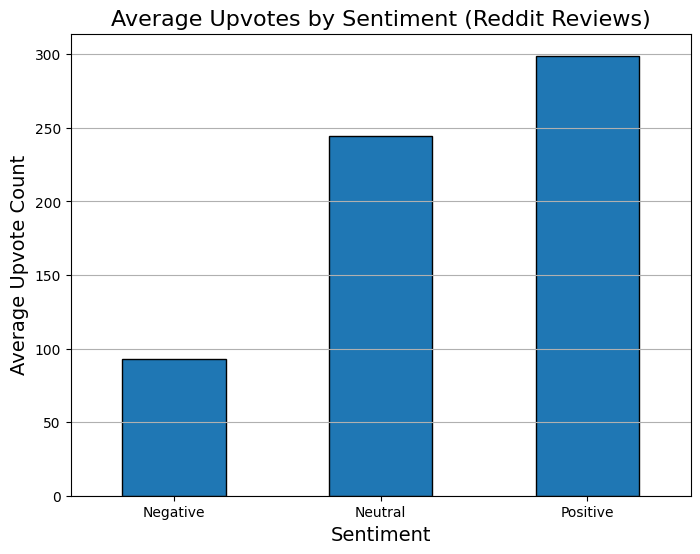

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter only Reddit reviews
reddit_reviews = df_combined[df_combined['data_source'] == 'Reddit']

# Group by sentiment
upvotes_by_sentiment = reddit_reviews.groupby('sentiment')['upvote_count'].mean()

# Plot
upvotes_by_sentiment.plot(kind='bar', figsize=(8,6), edgecolor='black')
plt.title('Average Upvotes by Sentiment (Reddit Reviews)', fontsize=16)
plt.ylabel('Average Upvote Count', fontsize=14)
plt.xlabel('Sentiment', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


The above bar plot visualizes how upvotes are related to sentiments of the user. Here the plot shows how many upvotes were there for a review under given snetiment( Negative, Positive, Neutral)

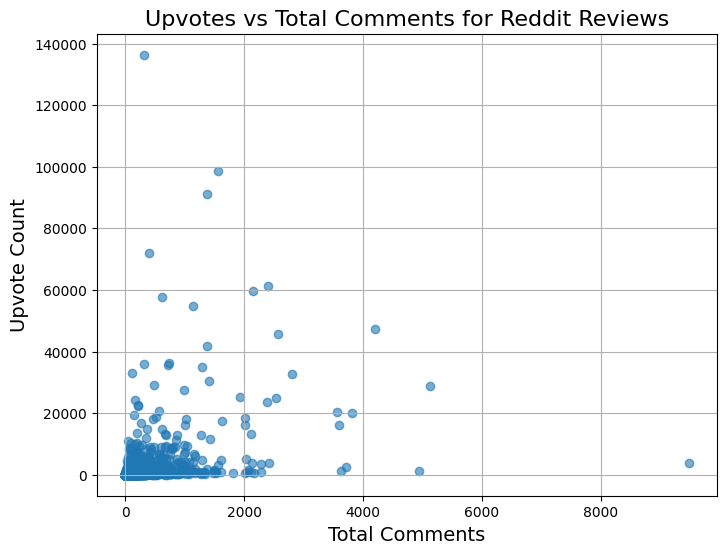

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(reddit_reviews['total_comments'], reddit_reviews['upvote_count'], alpha=0.6)
plt.title('Upvotes vs Total Comments for Reddit Reviews', fontsize=16)
plt.xlabel('Total Comments', fontsize=14)
plt.ylabel('Upvote Count', fontsize=14)
plt.grid(True)
plt.show()


These are top 10 reviews post that received highes number of upvotes during the period of 1 year.

In [25]:



# Step 1: Function to prepare radar data
def prepare_radar_data(app_reviews):
    rating_counts = app_reviews['app_rating'].value_counts().sort_index()
    for i in [1.0, 2.0, 3.0, 4.0, 5.0]:
        if i not in rating_counts.index:
            rating_counts[i] = 0
    rating_counts = rating_counts.sort_index()
    labels = list(rating_counts.index)
    stats = list(rating_counts.values)
    return labels, stats

# Step 2: Function to plot side-by-side spider charts
def plot_spider_charts(data_source_choice):
    # Filter data
    filtered_reviews = df_combined[df_combined['data_source'] == data_source_choice]

    apps = {
        'UberEats': 'green',
        'DoorDash': 'red',
        'GrubHub': 'orange'
    }

    fig, axs = plt.subplots(1, 3, figsize=(20, 7), subplot_kw=dict(polar=True))

    for ax, (app_name, color) in zip(axs, apps.items()):
        app_reviews = filtered_reviews[filtered_reviews['app_name'] == app_name]
        labels, stats = prepare_radar_data(app_reviews)

        angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
        stats += stats[:1]
        angles += angles[:1]

        ax.plot(angles, stats, 'o-', linewidth=2, color=color)
        ax.fill(angles, stats, alpha=0.25, color=color)
        ax.set_thetagrids(np.degrees(angles[:-1]), labels)
        ax.set_title(f'{app_name}', size=16)
        ax.grid(True)

    plt.suptitle(f'Comparison of App Ratings ({data_source_choice})', fontsize=20, y=1.1)
    plt.tight_layout()
    plt.show()

# Step 3: Create dropdown for data source
data_source_dropdown = widgets.Dropdown(
    options=['Google Play', 'App Store'],
    value='Google Play',
    description='Source:',
    disabled=False,
)

# Step 4: Create interactive widget
interact(plot_spider_charts, data_source_choice=data_source_dropdown)


interactive(children=(Dropdown(description='Source:', options=('Google Play', 'App Store'), value='Google Play…

<function __main__.plot_spider_charts(data_source_choice)>